<a href="https://colab.research.google.com/github/Pranjal-777/Covid/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

#Upload the dataset
uploaded = files.upload()



Saving training_data_with_weather_info_week_1.csv to training_data_with_weather_info_week_1.csv


In [5]:
# Load the dataset
file_path = 'training_data_with_weather_info_week_1.csv'
data = pd.read_csv(file_path)
print(data.head())

   Id Province/State Country/Region   Lat  Long        Date  ConfirmedCases  \
0   1            NaN    Afghanistan  33.0  65.0  2020-01-22             0.0   
1   2            NaN    Afghanistan  33.0  65.0  2020-01-23             0.0   
2   3            NaN    Afghanistan  33.0  65.0  2020-01-24             0.0   
3   4            NaN    Afghanistan  33.0  65.0  2020-01-25             0.0   
4   5            NaN    Afghanistan  33.0  65.0  2020-01-26             0.0   

   Fatalities  day_from_jan_first  temp   min   max    stp     slp  dewp  \
0         0.0                  22  42.6  33.6  54.9  999.9  1024.3  27.4   
1         0.0                  23  42.0  32.7  55.9  999.9  1020.8  22.8   
2         0.0                  24  40.1  36.9  43.2  999.9  1018.6  34.5   
3         0.0                  25  46.0  37.9  56.3  999.9  1018.0  37.8   
4         0.0                  26  42.8  36.1  53.1  999.9  1014.8  33.2   

         rh        ah  wdsp   prcp  fog  
0  0.545709  0.186448   9.

Group By region and Date:

In [7]:
# Ensure the date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group by region and date to sum up cases and fatalities
time_region = data.groupby(['Country/Region', 'Date'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()
print(time_region.head())


  Country/Region       Date  ConfirmedCases  Fatalities
0    Afghanistan 2020-01-22             0.0         0.0
1    Afghanistan 2020-01-23             0.0         0.0
2    Afghanistan 2020-01-24             0.0         0.0
3    Afghanistan 2020-01-25             0.0         0.0
4    Afghanistan 2020-01-26             0.0         0.0


3.Plot Trends for Selected Regions:

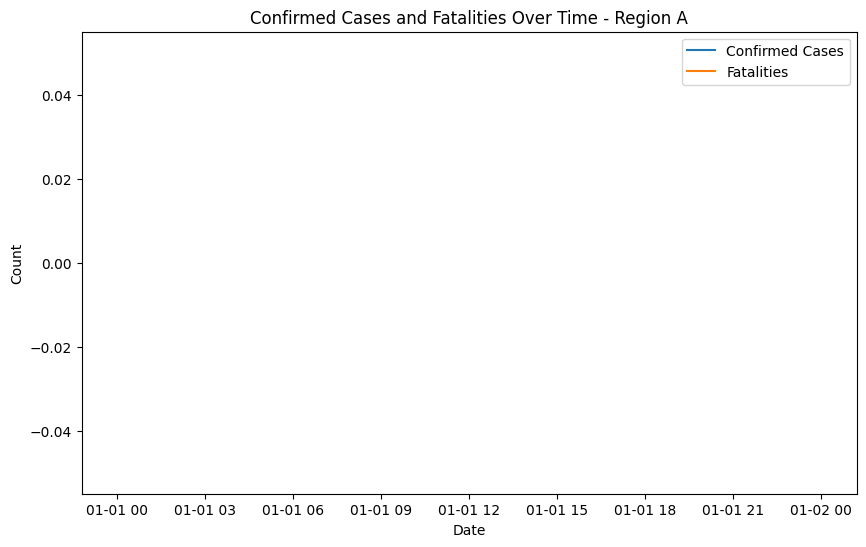

In [9]:
# Filter data for a specific region (e.g., 'Region A')
region_data = time_region[time_region['Country/Region'] == 'Region A']

# Plot cases and fatalities over time
plt.figure(figsize=(10, 6))
plt.plot(region_data['Date'], region_data['ConfirmedCases'], label='Confirmed Cases')
plt.plot(region_data['Date'], region_data['Fatalities'], label='Fatalities')
plt.title('Confirmed Cases and Fatalities Over Time - Region A')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


### `**2. Regions with the Highest and Lowest Total Confirmed Cases and Fatalities**`


Step1:Aggregate by total region:

In [11]:
region_totals = data.groupby('Country/Region')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
print(region_totals.sort_values(by='ConfirmedCases', ascending=False).head())


    Country/Region  ConfirmedCases  Fatalities
29           China       3500461.0    121046.0
75           Italy        571924.0     46856.0
71            Iran        278992.0     16870.0
139          Spain        232453.0     12464.0
154             US        219412.0      2972.0


Find Regions with Highest and Lowest Totals:

In [12]:
# Highest confirmed cases and fatalities
max_cases = region_totals.loc[region_totals['ConfirmedCases'].idxmax()]
max_fatalities = region_totals.loc[region_totals['Fatalities'].idxmax()]

# Lowest confirmed cases and fatalities
min_cases = region_totals.loc[region_totals['ConfirmedCases'].idxmin()]
min_fatalities = region_totals.loc[region_totals['Fatalities'].idxmin()]

print("Region with Highest Cases:", max_cases)
print("Region with Highest Fatalities:", max_fatalities)
print("Region with Lowest Cases:", min_cases)
print("Region with Lowest Fatalities:", min_fatalities)


Region with Highest Cases: Country/Region        China
ConfirmedCases    3500461.0
Fatalities         121046.0
Name: 29, dtype: object
Region with Highest Fatalities: Country/Region        China
ConfirmedCases    3500461.0
Fatalities         121046.0
Name: 29, dtype: object
Region with Lowest Cases: Country/Region    Aruba
ConfirmedCases      0.0
Fatalities          0.0
Name: 7, dtype: object
Region with Lowest Fatalities: Country/Region    Antigua and Barbuda
ConfirmedCases                   16.0
Fatalities                        0.0
Name: 4, dtype: object


## **3. Correlation Between Temperature and Confirmed Cases or Fatalities**

1.Check Correlation Between Temperature and Cases/Fatalities

In [13]:
# Compute correlation
correlation_cases = data['temp'].corr(data['ConfirmedCases'])
correlation_fatalities = data['temp'].corr(data['Fatalities'])

print("Correlation between Temperature and Confirmed Cases:", correlation_cases)
print("Correlation between Temperature and Fatalities:", correlation_fatalities)


Correlation between Temperature and Confirmed Cases: -0.011405281520436761
Correlation between Temperature and Fatalities: -0.005023249358964576


2.Visualize Relationships

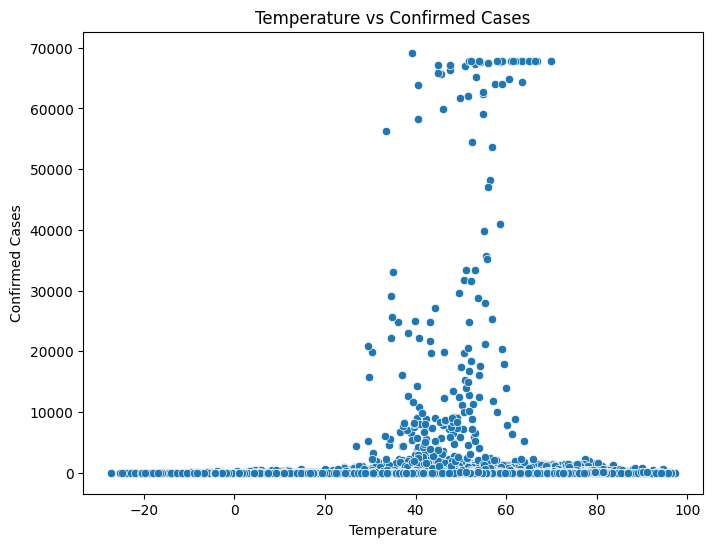

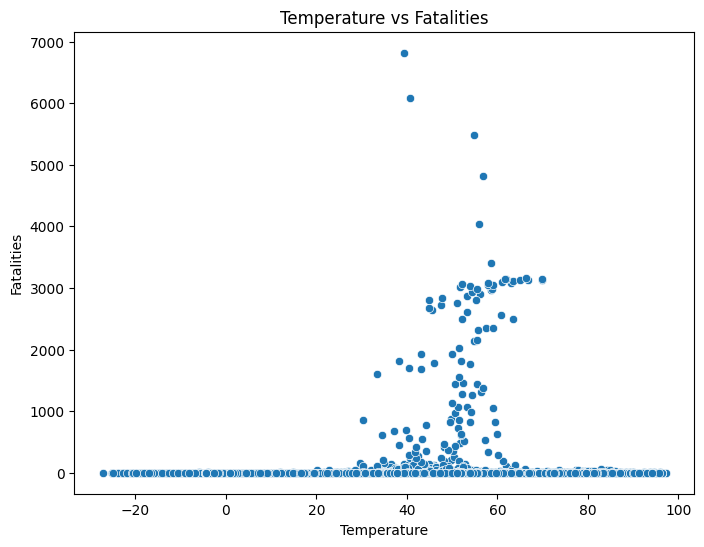

In [14]:
import seaborn as sns

# Scatter plot for temperature vs confirmed cases
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['temp'], y=data['ConfirmedCases'])
plt.title('Temperature vs Confirmed Cases')
plt.xlabel('Temperature')
plt.ylabel('Confirmed Cases')
plt.show()

# Scatter plot for temperature vs fatalities
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['temp'], y=data['Fatalities'])
plt.title('Temperature vs Fatalities')
plt.xlabel('Temperature')
plt.ylabel('Fatalities')
plt.show()
